# 1. Library Import

In [1]:
# system path config
import os
import sys
sys.path.append('/nfs/users/yihao/datalake-vis/src')   # make this the src folder in project home
from datalake_vis.vis_instance.opt_vis_instance import OptStatsVisInstance
from datalake_vis.utils import plot_vis_plan

# general import
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
from typing import List, Tuple, Dict

# 2. Parameters Specification

In [2]:
# Specify some necessary parameters
tus_res_path = "data/santos/tus_results/results_k50_t6.pkl"         # table union search result path, please specify a pickle file
query_path = "data/santos/query"           # path to the directory that contains queries
datalake_path = "data/santos/datalake"        # path to the directory that contains datalake
n = 3                     # the number of result tables
k = 5

query_table_name = "mines_a.csv"           # the file name of the query table


# load table union search
tus_res = pickle.load(open(tus_res_path, "rb"))
result_table_names = [x[0] for i, x in enumerate(tus_res[query_table_name]) if i < n]
result_table_paths = [f"{datalake_path}/{x[0]}" for i, x in enumerate(tus_res[query_table_name]) if i < n]

args = {
    "query_path": f"{query_path}/{query_table_name}",
    "result_paths": result_table_paths[:n],
    "query_table_name": query_table_name,
    "result_table_names": result_table_names[:n],
    "column_matchings": tus_res[query_table_name][:n],
    "orig_query_path": f"{query_path}/{query_table_name}",
    "orig_result_paths": result_table_paths[:n],
    "bucket_num": 5,
    "preprocessed_data": False,
    "total_batch": 10,
    "text_format": "vector"
}

vis_ins = OptStatsVisInstance(**args)
top_k_plans = vis_ins.find_top_k(k)

/nfs/users/yihao/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/nfs/users/yihao/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/nfs/users/yihao/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [3]:
print(top_k_plans[0])

x: ('MINE', 'textual') | y: ('DepartmentNumber-NumÃ\x83Â©ro-de-MinistÃ\x83Â¨re', 'numerical') | f: min | util: 0.7576248313090419 | series: 4 | categories: 5



In [4]:
print(top_k_plans[0].plan_details())

==================== MINE vs. DepartmentNumber-NumÃÂ©ro-de-MinistÃÂ¨re ====================
x: ('MINE', 'textual') | y: ('DepartmentNumber-NumÃ\x83Â©ro-de-MinistÃ\x83Â¨re', 'numerical') | f: min
Count: 4 | X: (mines_a.csv(0).MINE); (mines_a.csv(1).MINE); (mines_2.csv(2).MINE); (mines_4.csv(3).MINE)
Count: 4 | Y: (mines_a.csv(0).DepartmentNumber-NumÃÂ©ro-de-MinistÃÂ¨re); (mines_a.csv(1).DepartmentNumber-NumÃÂ©ro-de-MinistÃÂ¨re); (mines_2.csv(2).DepartmentNumber-NumÃ©ro-de-MinistÃ¨re); (mines_4.csv(3).DepartmentNumber-NumÃ©ro-de-MinistÃ¨re)
util: 0.7576248313090419


In [7]:
def plot_vis_plan(data: Dict[str, List[float]], x_name: str, y_name: str, aggr: str, path: str, series: List[str]):
    """Plot and save figure"""
    tp = {}
    for v in data.values():
        for i, e in enumerate(v):
            if series[i] not in tp:
                tp[series[i]] = []
            tp[series[i]].append(e)

    index = data.keys()
    # print(len(data.keys()), len(data), [len(v) for v in data.values()])
    try:
        df = pd.DataFrame(tp, index=index)
    except Exception as e:
        print(e)
        print(x_name, y_name, aggr)
        print(data)
        print(tp)
    ax = df.plot.bar(rot=45)
    ax.plot()
    plt.xlabel(x_name)
    plt.ylabel(y_name)
    plt.tight_layout()
    # plt.savefig(f"{path}/{x_name}_{y_name}_{aggr}.png")

    plt.show()

    plt.clf()
    plt.close()

['(mines_a.csv(0).MINE)', '(mines_a.csv(1).MINE)', '(mines_2.csv(2).MINE)', '(mines_4.csv(3).MINE)']


/tmp/ipykernel_1040986/3197513408.py:23: UserWarning: Glyph 131 (\x83) missing from current font.
  plt.tight_layout()
/nfs/users/yihao/.local/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 131 (\x83) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


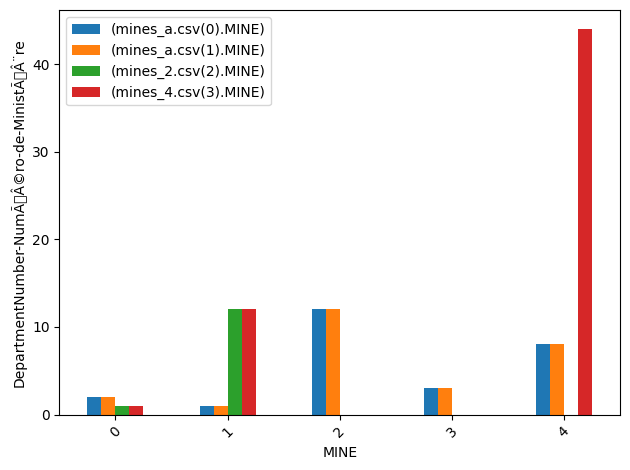

In [8]:
plan = top_k_plans[0]
print([str(s) for s in plan.x_series])
plot_vis_plan(plan.plot_data, plan.x_name, plan.y_name, plan.aggr.value.name, "", [str(s) for s in plan.x_series])